In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.cosmology import Planck18
from scipy.special import erf, erfc,erfcx
import scipy
from scipy.optimize import minimize, rosen, rosen_hess

In [2]:
z_g = np.load('/global/u1/z/zhaozhon/Dataset/z_g.npy')
z_r = np.load('/global/u1/z/zhaozhon/Dataset/z_r.npy')
z_i = np.load('/global/u1/z/zhaozhon/Dataset/z_i.npy')
apr_mag_g = np.load('/global/u1/z/zhaozhon/Dataset/apr_mag_g.npy')
apr_mag_r = np.load('/global/u1/z/zhaozhon/Dataset/apr_mag_r.npy')
apr_mag_i = np.load('/global/u1/z/zhaozhon/Dataset/apr_mag_i.npy')
magerr_g_1 = np.load('/global/u1/z/zhaozhon/Dataset/magerr_g_1.npy')
magerr_r_1 = np.load('/global/u1/z/zhaozhon/Dataset/magerr_r_1.npy')
magerr_i_1 = np.load('/global/u1/z/zhaozhon/Dataset/magerr_i_1.npy')
tid_g=np.load('/global/u1/z/zhaozhon/Dataset/tid_g.npy')
k_g=np.load('/global/u1/z/zhaozhon/Dataset/k_g.npy')
index_g=np.load('/global/u1/z/zhaozhon/Dataset/index_g.npy')
tid_r=np.load('/global/u1/z/zhaozhon/Dataset/tid_r.npy')
k_r=np.load('/global/u1/z/zhaozhon/Dataset/k_r.npy')
index_r=np.load('/global/u1/z/zhaozhon/Dataset/index_r.npy')
tid_i=np.load('/global/u1/z/zhaozhon/Dataset/tid_i.npy')
k_i=np.load('/global/u1/z/zhaozhon/Dataset/k_i.npy')
index_i=np.load('/global/u1/z/zhaozhon/Dataset/index_i.npy')

In [3]:
z_g = z_g[index_g]
z_r = z_r[index_r]
z_i = z_i[index_i]
apr_mag_g = apr_mag_g[index_g]
apr_mag_r = apr_mag_r[index_r]
apr_mag_i = apr_mag_i[index_i]
magerr_g_1 = magerr_g_1[index_g]
magerr_r_1 = magerr_r_1[index_r]
magerr_i_1 = magerr_i_1[index_i]

In [4]:
d_g = Planck18.distmod(z_g).value

In [5]:
print(apr_mag_g.dtype)

float64


In [6]:
def log_likelihood(params,apr_mag, magerr, d, k, m_lim):
    # Filter arrays based on the limiting magnitude
    sigma_I, M_X = params
    indice = apr_mag < m_lim
    filtered_apr_mag = apr_mag[indice]
    filtered_magerr = magerr[indice]
    filtered_d = d[indice]
    filtered_k = k[indice]
    indice1 = np.isnan(filtered_k) | np.isinf(filtered_k)
    filtered_apr_mag = filtered_apr_mag[~indice1]
    filtered_magerr = filtered_magerr[~indice1]
    filtered_d = filtered_d[~indice1]
    filtered_k = filtered_k[~indice1]
    # Calculate the variance for the filtered data
    variance = sigma_I**2 + filtered_magerr**2
    
    # Calculate each term of the log-likelihood
    term1 = -0.5 * np.log(2 * np.pi * variance)
    term2 = -0.5 * (filtered_apr_mag - (M_X + filtered_k + filtered_d))**2 / variance 
    #term3 = -np.log(0.5 * erfc((m_lim - filtered_apr_mag) / np.sqrt(2 * variance)))
    term3 = -np.log( erfcx(-(m_lim - filtered_apr_mag) / np.sqrt(2 * variance))) + (((m_lim - filtered_apr_mag)) / np.sqrt(2 * variance))**2
    #indice1 = np.isinf(term3)
    #term1 = term1[~indice1]
    #term2 = term2[~indice1]
    #term3 = term3[~indice1]
    # Sum the terms to get the total log-likelihood
    total_log_likelihood = np.sum(term1 +term2+term3)
    print(total_log_likelihood.shape)
    return total_log_likelihood

In [7]:
# New 
'''
def log_likelihood(params,apr_mag, magerr, d, k, m_lim):
    # Filter arrays based on the limiting magnitude
    sigma_I, M_X = params
    indice = apr_mag < m_lim
    filtered_apr_mag = apr_mag[indice]
    filtered_magerr = magerr[indice]
    filtered_d = d[indice]
    filtered_k = k[indice]
    indice1 = np.isnan(filtered_k) | np.isinf(filtered_k)
    filtered_apr_mag = filtered_apr_mag[~indice1]
    filtered_magerr = filtered_magerr[~indice1]
    filtered_d = filtered_d[~indice1]
    filtered_k = filtered_k[~indice1]
    # Calculate the variance for the filtered data
    variance = sigma_I**2 + filtered_magerr**2
    
    # Calculate each term of the log-likelihood
    term1 = -0.5 * np.log(2 * np.pi * variance)
    term2 = -0.5 * (filtered_apr_mag - (M_X + filtered_k + filtered_d + (filtered_apr_mag-filtered_apr_mag2)*c))**2 / variance #different bands abs_mag,color of quasar
    #term3 = -np.log(0.5 * erfc((m_lim - filtered_apr_mag) / np.sqrt(2 * variance)))
    term3 = -np.log( erfcx(-(m_lim - filtered_apr_mag) / np.sqrt(2 * variance))) + (((m_lim - filtered_apr_mag)) / np.sqrt(2 * variance))**2
    #indice1 = np.isinf(term3)
    #term1 = term1[~indice1]
    #term2 = term2[~indice1]
    #term3 = term3[~indice1]
    # Sum the terms to get the total log-likelihood
    total_log_likelihood = np.sum(term1 +term2+term3)
    print(total_log_likelihood.shape)
    return total_log_likelihood
'''

'\ndef log_likelihood(params,apr_mag, magerr, d, k, m_lim):\n    # Filter arrays based on the limiting magnitude\n    sigma_I, M_X = params\n    indice = apr_mag < m_lim\n    filtered_apr_mag = apr_mag[indice]\n    filtered_magerr = magerr[indice]\n    filtered_d = d[indice]\n    filtered_k = k[indice]\n    indice1 = np.isnan(filtered_k) | np.isinf(filtered_k)\n    filtered_apr_mag = filtered_apr_mag[~indice1]\n    filtered_magerr = filtered_magerr[~indice1]\n    filtered_d = filtered_d[~indice1]\n    filtered_k = filtered_k[~indice1]\n    # Calculate the variance for the filtered data\n    variance = sigma_I**2 + filtered_magerr**2\n    \n    # Calculate each term of the log-likelihood\n    term1 = -0.5 * np.log(2 * np.pi * variance)\n    term2 = -0.5 * (filtered_apr_mag - (M_X + filtered_k + filtered_d + (filtered_apr_mag-filtered_apr_mag2)*c))**2 / variance #different bands abs_mag,color of quasar\n    #term3 = -np.log(0.5 * erfc((m_lim - filtered_apr_mag) / np.sqrt(2 * variance)))\

(array([1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        4.000e+00, 3.000e+00, 8.000e+00, 5.000e+00, 1.000e+01, 6.000e+00,
        1.100e+01, 1.000e+01, 1.800e+01, 2.300e+01, 1.600e+01, 1.900e+01,
        1.500e+01, 3.300e+01, 3.200e+01, 2.900e+01, 4.800e+01, 4.000e+01,
        3.900e+01, 4.500e+01, 4.700e+01, 5.600e+01, 5.100e+01, 5.500e+01,
        6.400e+01, 7.400e+01, 9.800e+01, 9.100e+01, 1.240e+02, 1.120e+02,
        1.030e+02, 1.550e+02, 1.490e+02, 1.570e+02, 1.770e+02, 2.040e+02,
        2.000e+02, 2.160e+02, 2.170e+02, 2.270e+02, 2.520e+02, 2.550e+02,
        2.840e+02, 3.240e+02, 3.500e+02, 3.090e+02, 3.350e+02, 3.660e+02,
        4.300e+02, 4.330e+02, 4.420e+02, 4.710e+02, 5.240e+02, 5.570e+02,
        5.650e+02, 7.100e+02, 7.610e+02, 8.690e+02, 9.380e+02, 9.720e+02,
        1.056e+03, 1.143e+03, 1.248e+03, 1.183e+03, 1.176e+03, 1.078e+03,
        8.430e+02, 6.820e+02, 5.010e+0

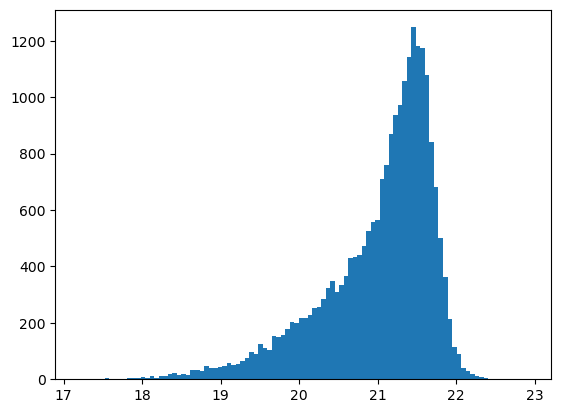

In [8]:
plt.hist(apr_mag_g,bins=100)

(array([  3.,   0.,   1.,   1.,   0.,   0.,   1.,   2.,   1.,   4.,   6.,
          3.,   5.,   6.,   5.,   6.,  10.,   9.,   9.,  15.,  14.,  20.,
         19.,  27.,  25.,  39.,  35.,  39.,  39.,  55.,  42.,  44.,  55.,
         60.,  68.,  61.,  93.,  84., 102.,  99., 110., 141., 151., 177.,
        151., 180., 188., 235., 207., 248., 267., 271., 296., 311., 346.,
        330., 332., 403., 434., 450., 534., 510., 583., 608., 675., 765.,
        761., 807., 831., 884., 913., 956., 945., 933., 893., 898., 842.,
        733., 680., 533., 410., 324., 218., 167.,  70.,  53.,  38.,  15.,
         16.,   6.,   5.,   7.,   2.,   1.,   0.,   0.,   0.,   0.,   2.,
          1.]),
 array([-28.01938568, -27.96021391, -27.90104215, -27.84187038,
        -27.78269862, -27.72352685, -27.66435509, -27.60518333,
        -27.54601156, -27.4868398 , -27.42766803, -27.36849627,
        -27.3093245 , -27.25015274, -27.19098097, -27.13180921,
        -27.07263744, -27.01346568, -26.95429391, -26.89512215

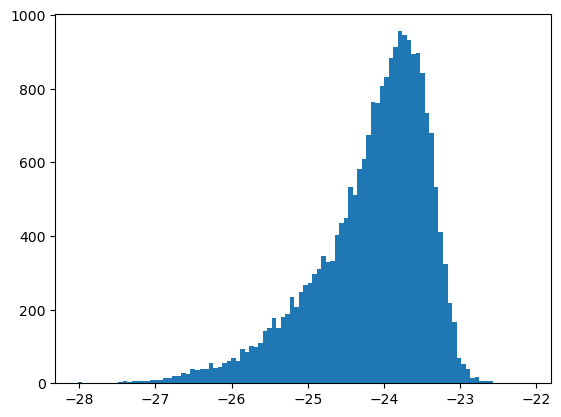

In [9]:
indice = np.isnan(k_g) | np.isinf(k_g)
plt.hist(apr_mag_g[~indice]-k_g[~indice]-d_g[~indice],bins=100)

In [10]:
log_likelihood(( 4.290e-02 ,-2.700e+01),apr_mag_g, magerr_g_1, d_g, k_g, 21.5)

()


-inf

In [11]:
def negative_log_likelihood(params, apr_mag, magerr, d, k, m_lim):
    sigma_I, M_X = params
    # Filter arrays based on the limiting magnitude
    indice = apr_mag < m_lim
    filtered_apr_mag = apr_mag[indice]
    filtered_magerr = magerr[indice]
    filtered_d = d[indice]
    filtered_k = k[indice]
    # Remove NaN and inf values
    indice1 = np.isnan(filtered_k) | np.isinf(filtered_k)
    filtered_apr_mag = filtered_apr_mag[~indice1]
    filtered_magerr = filtered_magerr[~indice1]
    filtered_d = filtered_d[~indice1]
    filtered_k = filtered_k[~indice1]
    # Calculate the variance for the filtered data
    variance = sigma_I**2 + filtered_magerr**2
    
    # Calculate each term of the log-likelihood
    term1 = -0.5 * np.log(2 * np.pi * variance)
    term2 = -0.5 * (filtered_apr_mag - (M_X + filtered_k + filtered_d))**2 / variance
    #term3 = -np.log( erfc((m_lim - filtered_apr_mag) / np.sqrt(2 * variance)))
    term3 = -np.log( erfcx(-(m_lim - filtered_apr_mag) / np.sqrt(2 * variance))) + (((m_lim - filtered_apr_mag)) / np.sqrt(2 * variance))**2
    #indice1 = np.isinf(term3)
    #term1 = term1[~indice1]
    #term2 = term2[~indice1]
    #erm3 = term3[~indice1]
    
    #print(np.min(term1))
    #print(np.min(term2))
    #print(np.min(term3))
    #print(np.max(term1))
    #print(np.max(term2))
    #print(np.max(term3))
    # Sum the terms to get the total log-likelihood and multiply by -1 for negative log-likelihood
    total_negative_log_likelihood = -np.sum(term1 + term2+term3 )
    
    return total_negative_log_likelihood

In [12]:
initial_guess = (1, -25)

# Bounds for parameters: assuming sigma_i > 0 and some reasonable bounds for M_X
bounds = [(None, None), (-30, -20)]  # Example bounds: sigma_i > 0, M_X within [-30, -20]

# Optimization call with method and bounds
result = scipy.optimize.minimize(negative_log_likelihood, initial_guess, args=(apr_mag_g, magerr_g_1, d_g, k_g, 21.5),
                  method='Nelder-Mead', bounds=bounds)

print(result)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 24928.63898777221
             x: [ 7.813e-01 -2.441e+01]
           nit: 36
          nfev: 69
 final_simplex: (array([[ 7.813e-01, -2.441e+01],
                       [ 7.813e-01, -2.441e+01],
                       [ 7.813e-01, -2.441e+01]]), array([ 2.493e+04,  2.493e+04,  2.493e+04]))


In [13]:
Hessian_at_optimum = rosen_hess(result.x)

# Estimate the covariance matrix
covariance_matrix = np.linalg.inv(Hessian_at_optimum)

# Standard errors of the estimates
standard_errors = np.sqrt(np.diag(covariance_matrix))

# Confidence intervals for each parameter
confidence_intervals = {
    "param1": (result.x[0] - 1.96 * standard_errors[0], result.x[0] + 1.96 * standard_errors[0]),
    "param2": (result.x[1] - 1.96 * standard_errors[1], result.x[1] + 1.96 * standard_errors[1])
}

print("Confidence Intervals:", confidence_intervals)

Confidence Intervals: {'param1': (0.7617078425750282, 0.8008857697280561), 'param2': (-24.554686135757194, -24.270820343802185)}


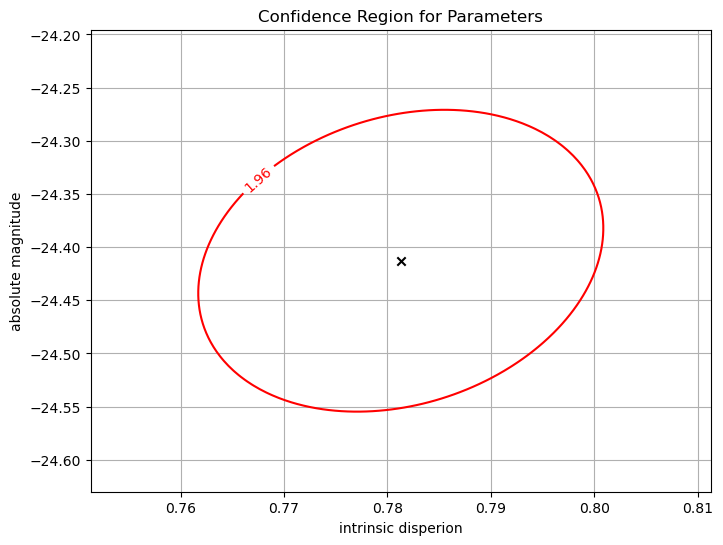

In [14]:
optimum_params = result.x  # Optimal parameter values
covariance_matrix = np.linalg.inv(Hessian_at_optimum)  # Inverse of the Hessian at the optimum

# Define the parameter grid
param1_range = np.linspace(optimum_params[0] - 3*standard_errors[0], optimum_params[0] + 3*standard_errors[0], 100)
param2_range = np.linspace(optimum_params[1] - 3*standard_errors[1], optimum_params[1] + 3*standard_errors[1], 100)
param1_grid, param2_grid = np.meshgrid(param1_range, param2_range)

# Compute the Mahalanobis distance for each point in the grid
inv_covmat = np.linalg.inv(covariance_matrix)
diff_grid = np.dstack((param1_grid - optimum_params[0], param2_grid - optimum_params[1]))
mahalanobis_distance = np.sqrt(np.sum(np.dot(diff_grid, inv_covmat) * diff_grid, axis=2))

# Plot the confidence region
plt.figure(figsize=(8, 6))
CS = plt.contour(param1_grid, param2_grid, mahalanobis_distance, levels=[1.96], colors='red')  # 95% confidence contour
plt.clabel(CS, inline=True, fontsize=10)
plt.scatter(optimum_params[0], optimum_params[1], c='black', marker='x')  # Optimum point
plt.xlabel('intrinsic disperion')
plt.ylabel('absolute magnitude')
plt.title('Confidence Region for Parameters')
plt.grid(True)
plt.show()

In [15]:
print(result.x[1])

-24.41275323977969


In [16]:
%%capture
import emcee
import corner
# Define the log prior
def log_prior(params):
    sigma_I, M_X = params
    if 0 < sigma_I < 10 and -30 < M_X < -20:  # Example ranges, adjust as necessary
        return 0.0  # log(1) for uniform prior
    return -np.inf  # log(0) outside the prior ranges

# Define the log posterior
def log_posterior(params, apr_mag, magerr, d, k, m_lim):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, apr_mag, magerr, d, k, m_lim)

# Initialize the sampler
ndim = 2  # Number of parameters
nwalkers = 100  # Number of MCMC walkers
nsteps = 2000  # Number of MCMC steps
start_pos = [1, -25] + 0.1 * np.random.randn(nwalkers, ndim)  # Starting positions

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(apr_mag_g, magerr_g_1, d_g, k_g, 21.5))

# Run the MCMC
sampler.run_mcmc(start_pos, nsteps, progress=True)
samples = sampler.get_chain(discard=500, flat=True)  # Discard burn-in

Text(0.5, 0.98, 'MCMC Parameter Estimation')

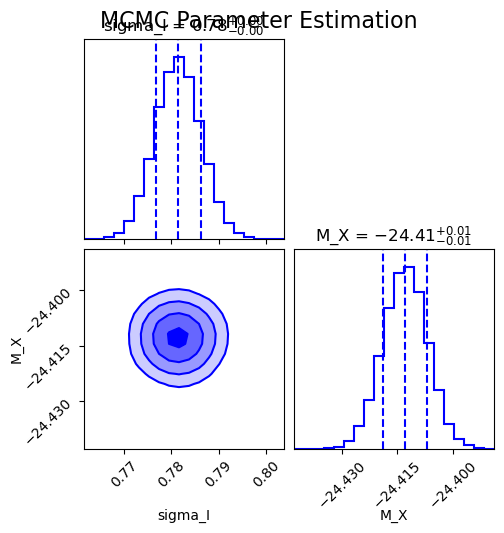

In [17]:
fig = corner.corner(samples, labels=["sigma_I", "M_X"], truths=[0.01, -25],
                    quantiles=[0.16, 0.5, 0.84],  # Show the 16th, 50th, and 84th percentiles
                    show_titles=True, title_kwargs={"fontsize": 12},
                    plot_datapoints=False, plot_density=True,
                    fill_contours=True, smooth=1.0,
                    hist_kwargs={"linewidth": 1.5, "histtype": "step", "density": True},
                    color='blue', truth_color='red')
fig.suptitle('MCMC Parameter Estimation', fontsize=16)

In [18]:
try:
    tau = sampler.get_autocorr_time()
    print(f"Autocorrelation time: {tau}")
except RuntimeError as e:
    print(f"Autocorrelation calculation failed: {e}")


Autocorrelation time: [25.59240559 25.29571369]


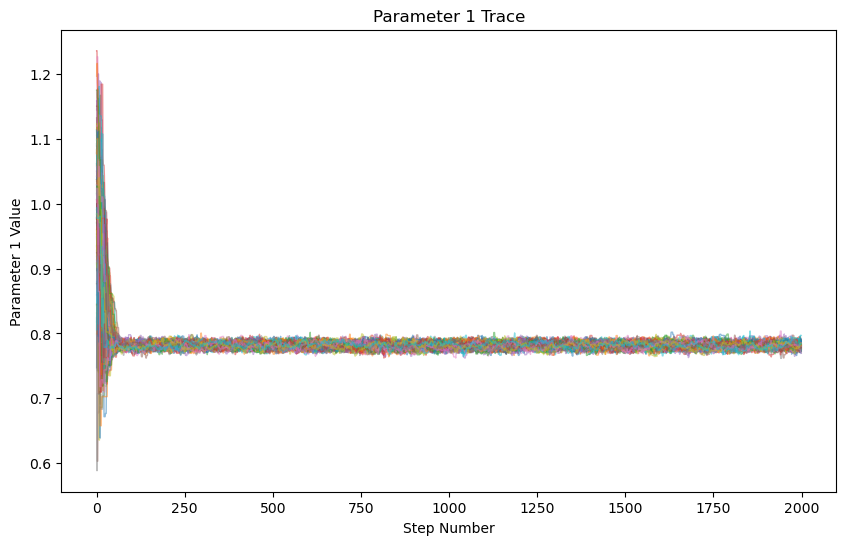

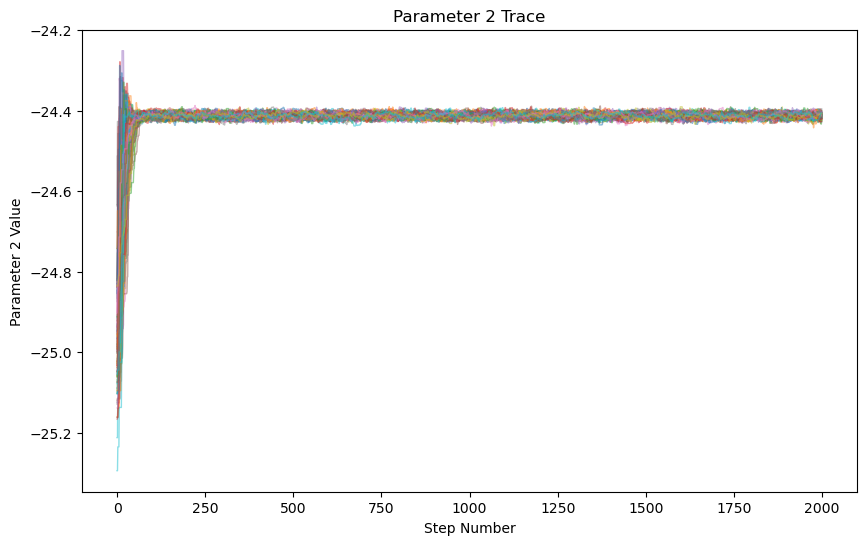

In [19]:
nsteps = sampler.chain.shape[1]
for i in range(sampler.chain.shape[2]):  # For each parameter
    plt.figure(figsize=(10, 6))
    for chain in sampler.chain[..., i]:
        plt.plot(chain, alpha=0.5, lw=1)
    plt.title(f"Parameter {i+1} Trace")
    plt.xlabel("Step Number")
    plt.ylabel(f"Parameter {i+1} Value")
    plt.show()